In [1]:
from torchvision.models.vgg import vgg19
import torch
import numpy as np
import pywt
import matplotlib.pyplot as plt
import matplotlib.cm
from imageio import imread
from imageio import imsave
from scipy import linalg as la
from utils.denoising_utils import *
from utils.fusion_index import *
from PIL import Image
import skimage.measure

In [2]:
def Fusion_PCA(image1, image2):
    # Converting Image data to numpy Array to be able to do necessary calculation
    a = np.array(image1)
    b = np.array(image2)
    # getting Image dimensions
    temp1 = a.shape
    temp2 = b.shape
    # Starting PCA algorithm
    # creating matrix with both Images
    # vector1 = np.reshape(a, temp1[0] * temp1[1], order='F')
    # vector2 = np.reshape(b, temp2[0] * temp2[1], order='F')
    vector1 = np.reshape(a, temp1[0] * temp1[1], order='F')
    vector2 = np.reshape(b, temp2[0] * temp2[1], order='F')
    # Convolution of created matrix
    c = np.cov(vector1, vector2)
    # getting Eigenvalue and Eigenvector of this matrix
    d, v = la.eig(c)
    sum1 = np.sum(v, axis=0)
    # Calculating PCA
    if d[0] >= d[1]:
        pca = np.divide(v[:, 0], sum1[0])
    else:
        pca = np.divide(v[:, 1], sum1[1])
    # Creating fused image
    result = (pca[0] * image1) + (pca[1] * image2)
    return result

In [3]:
fname_us = "C:\\Users\\Leo\\Desktop\\FinalYearProject\\Dataf\\adown.jpg"
fname_mr = "C:\\Users\\Leo\\Desktop\\FinalYearProject\\Dataf\\aup.jpg"
fname_original = "C:\\Users\\Leo\\Desktop\\FinalYearProject\\Dataf\\kid.png"
print(fname_us)
print(fname_mr)

C:\Users\Leo\Desktop\FinalYearProject\Dataf\adown.jpg
C:\Users\Leo\Desktop\FinalYearProject\Dataf\aup.jpg


In [4]:
us_pil = get_gray_image(fname_us,-1)[0]
us_pil = us_pil.resize((512,512),Image.ANTIALIAS)
us_np = pil_to_np(us_pil)
# us_pil.show()
mr_pil = get_gray_image(fname_mr,-1)[0]
mr_pil = mr_pil.resize((512,512),Image.ANTIALIAS)
mr_np = pil_to_np(mr_pil)


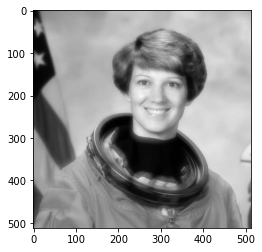

In [5]:
img = Fusion_PCA(us_pil,mr_pil)
# im = Image.fromarray(np.uint8(matplotlib.cm.gist_earth(img)))
plt.imshow(img,cmap = matplotlib.cm.gray)

In [6]:
# img_pil = Image.fromarray(np.uint8(img)).convert('RGB')
# img_pil = img_pil.save("PCA_remote_fusion.jpg")

plt.imsave("PCA_remote_fusion_astro.jpg",img,cmap='gray')

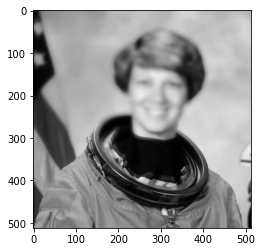

In [7]:
plt.imshow(us_pil,cmap = matplotlib.cm.gray)

In [8]:
print(find_fusion_index(us_pil,mr_pil,img))

0.9911422240081414
